In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
    ('geolocation.csv', 'geolocation')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Pomboy008',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/abidhossain/Downloads/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [7]:
query = "SELECT distinct(customer_city) from customers"

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [ ]:
query = "SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp)= 2017"

cur.execute(query)
data = cur.fetchall()
data

[(45101,)]

In [22]:
#FIND THE TOTAL SALES PER CATEGORY
query = """select upper(products.product_category) category, round(sum(payments.payment_value)) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)
data = cur.fetchall()
data

[('PERFUMERY', 506739.0),
 ('FURNITURE DECORATION', 1430176.0),
 ('TELEPHONY', 486882.0),
 ('BED TABLE BATH', 1712554.0),
 ('AUTOMOTIVE', 852294.0),
 ('COMPUTER ACCESSORIES', 1585330.0),
 ('HOUSEWARES', 1094758.0),
 ('BABIES', 539846.0),
 ('TOYS', 619038.0),
 ('FURNITURE OFFICE', 646826.0),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.0),
 ('PET SHOP', 311269.0),
 ('GENERAL INTEREST BOOKS', 64695.0),
 ('STATIONARY STORE', 317440.0),
 ('WATCHES PRESENT', 1429217.0),
 ('PCS', 279122.0),
 ('CLIMATIZATION', 91171.0),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241476.0),
 ('SPORT LEISURE', 1392128.0),
 ('BAGS ACCESSORIES', 187151.0),
 ('ELECTRONICS', 259857.0),
 ('CASA CONSTRUCAO', 136645.0),
 ('GAMES CONSOLES', 195480.0),
 ('FASHION BAGS AND ACCESSORIES', 218158.0),
 ('HOME APPLIANCES', 95532.0),
 ('GARDEN TOOLS', 838281.0),
 ('AGRO INDUSTRIA E COMERCIO', 118731.0),
 (None, 252802.0),
 ('AUDIO', 60325.0),
 ('TECHNICAL BOOKS', 24915.0),
 ('CONSTRUCTION TOOLS GARDEN', 42394.0),
 ('MARKET 

In [16]:
df = pd.DataFrame(data, columns=['Category', 'Sales'])
df

,Category,Sales
0,PERFUMERY,506739.0
1,FURNITURE DECORATION,1430176.0
2,TELEPHONY,486882.0
3,BED TABLE BATH,1712554.0
4,AUTOMOTIVE,852294.0
...,...,...
69,CDS MUSIC DVDS,1199.0
70,LA CUISINE,2914.0
71,FASHION CHILDREN'S CLOTHING,786.0
72,PC GAMER,2174.0


In [25]:
#calculate the percentage of orders that were paid in instalments
query = """select ((sum(case when payment_installments >=1 then 1 else 0 end))/count(*))*100 from payments
"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

In [38]:
import matplotlib as plt
print(type(plt))

<class 'module'>


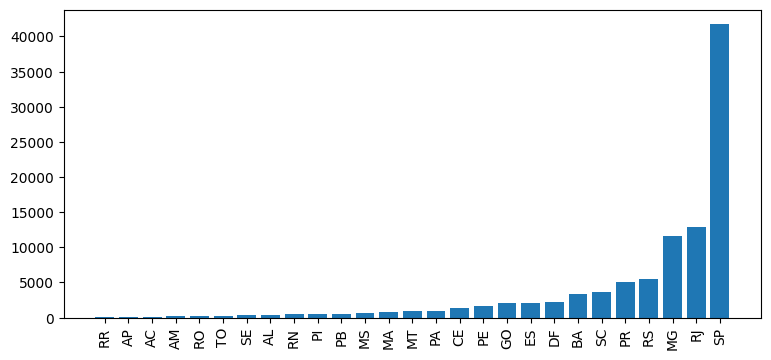

In [50]:
#Count the number of customers from each state

query = """select count(customer_id), customer_state from customers group by customer_state
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Count", "State"])
df= df.sort_values(by = 'Count', ascending=True)
plt.figure(figsize= (9,4))
plt.bar(df["State"], df["Count"])
plt.xticks(rotation=90)

plt.show() 

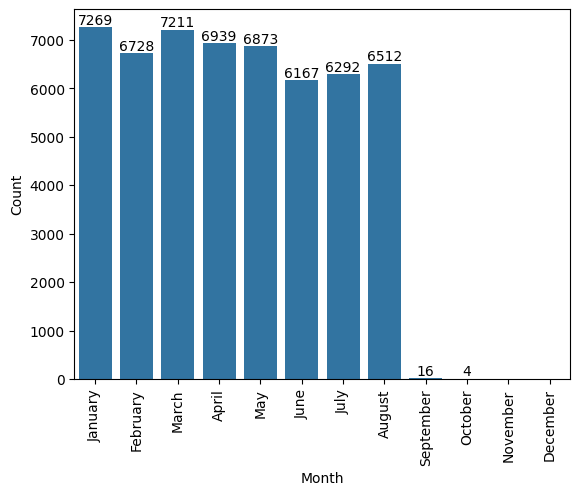

In [62]:
#Calculate the number of orders per month in 2018
query = """select monthname(order_purchase_timestamp) as months, count(order_id) ordercount
from orders where year(order_purchase_timestamp)= 2018 
group by months
"""

cur.execute(query)
data = cur.fetchall()
data
o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = pd.DataFrame(data, columns=["Month", "Count"])

ax=sns.barplot(x=df["Month"], y=df["Count"], data=df, order=o)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

plt.show()



In [ ]:
select orders.order_id, orders.customer_id, count(order_items.order_id) from orders
join orders_items on order_items.product_id = orders.product_id
group by orders.order_id, orders.customer_id;

In [66]:
#calculate the average sales per order
query = """with count_per_order as (SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) as oc
FROM orders
JOIN order_items ON order_items.order_id = orders.order_id
GROUP BY orders.order_id, orders.customer_id)

select customers.customer_city, avg(count_per_order.oc)
from customers join count_per_order on
customers.customer_id = count_per_order.customer_id
group by customers.customer_city;



"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data, columns=['City', 'Average sales per order'])
df

,City,Average sales per order
0,sao paulo,1.1562
1,sao jose dos campos,1.1385
2,porto alegre,1.1749
3,indaial,1.1154
4,treze tilias,1.2727
...,...,...
4105,sambaiba,1.0000
4106,guairaca,2.0000
4107,japaratuba,1.0000
4108,tuiuti,1.0000


In [71]:
#Calculate the percentage of total revenue contributed by each product category
#FIND THE TOTAL SALES PER CATEGORY
query = """select upper(products.product_category) category, round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales desc
"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data, columns=['Product', 'Percentage revenue'])
df

,Product,Percentage revenue
0,BED TABLE BATH,11.0
1,COMPUTER ACCESSORIES,10.0
2,HEALTH BEAUTY,10.0
3,FURNITURE DECORATION,9.0
4,WATCHES PRESENT,9.0
...,...,...
69,CDS MUSIC DVDS,0.0
70,LA CUISINE,0.0
71,FASHION CHILDREN'S CLOTHING,0.0
72,PC GAMER,0.0


In [73]:
import numpy as np

In [76]:
#Identify the correlation between the product price and the number of times the product has been purchased
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

df

,Category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,CITTE AND UPHACK FURNITURE,38,114.95
72,House Comfort 2,30,25.34


In [77]:

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157567


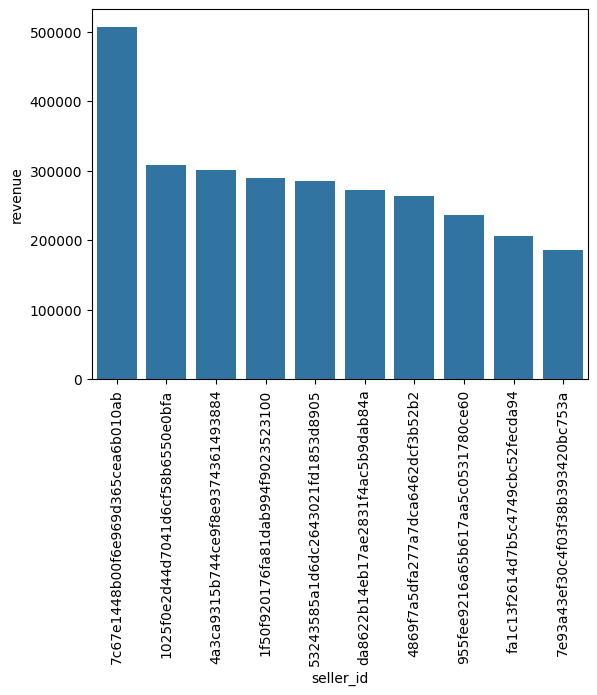

In [91]:
#Identify the correlation between the product price and the number of times the product has been purchased

query = """select *, dense_rank() over (order by revenue desc) as rn FROM
(select order_items.seller_id seller_id, sum(payments.payment_value) as revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;

"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["seller_id", "revenue", "rank"])

sns.barplot(x = "seller_id", y = "revenue", data = df.head(10))
plt.xticks(rotation = 90)
plt.show()

In [92]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year. 

In [94]:

query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [95]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


In [96]:
#Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

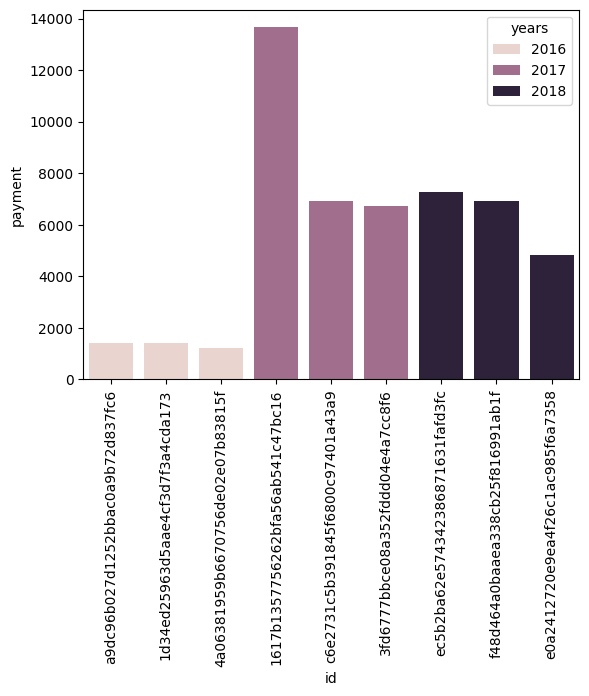

In [99]:
#Identify the top 3 customers who spent the most money in each year.
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()